<a href="https://colab.research.google.com/github/JoumanaMaki/Convolutional_neural_network_for_image_classification/blob/main/CNN_for_cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for dogs and cats

## Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import zipfile
import cv2
from google.colab.patches import cv2_imshow

In [3]:
tf.__version__

'2.17.0'

## Load the images

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

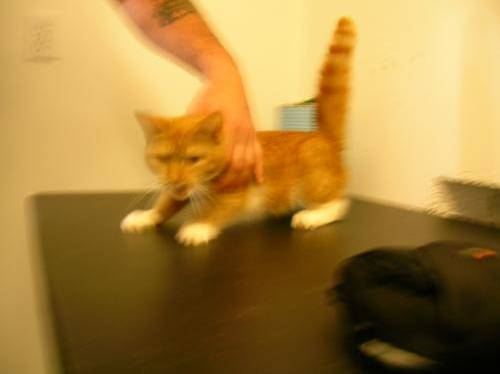

In [7]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.0.jpg')

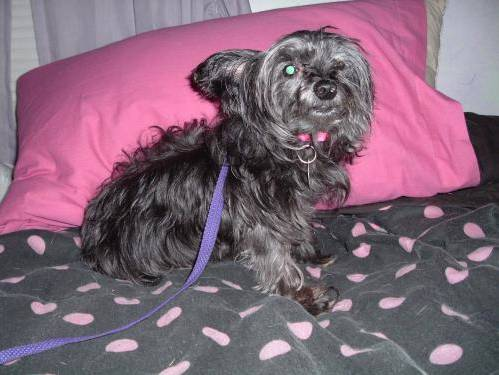

In [8]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.0.jpg')

## Train and test

In [9]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range= 0.2)
train_dataset = training_generator.flow_from_directory('/content/cat_dog_2/training_set',
                                                       target_size=(64,64),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                       shuffle = True)


Found 4000 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [11]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/cat_dog_2/test_set',
                                                       target_size=(64,64),
                                                       batch_size=1,
                                                       class_mode='categorical',
                                                       shuffle = False)

Found 1000 images belonging to 2 classes.


## Build and train the neural network

In [12]:
network = Sequential()
network.add(Conv2D(input_shape=(64,64,3), filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Conv2D(input_shape=(64,64,3), filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units=3137, activation='relu'))
network.add(Dense(units=3137, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3137)                │      19,678,401 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3137)                │       9,843,906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           6,276 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = network.fit(train_dataset, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 120s 955ms/step - accuracy: 0.5192 - loss: 1.4820
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 897ms/step - accuracy: 0.5822 - loss: 0.6713
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 888ms/step - accuracy: 0.6252 - loss: 0.6513
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 890ms/step - accuracy: 0.6117 - loss: 0.6479
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 887ms/step - accuracy: 0.6657 - loss: 0.6088
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 119s 949ms/step - accuracy: 0.6715 - loss: 0.6016
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 136s 901ms/step - accuracy: 0.6928 - loss: 0.5687
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step - accuracy: 0.7151 - loss: 0.5475
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 141s 890ms/step - accuracy: 0.7229 - loss: 0.5261
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.7550 - loss: 0.4924


## Evaluating the neural network

In [18]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [19]:
predictions = network.predict(test_dataset)
predictions

   1/1000 ━━━━━━━━━━━━━━━━━━━━ 4:29 270ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step


array([[0.6558825 , 0.34411752],
       [0.24949336, 0.75050664],
       [0.5536855 , 0.4463145 ],
       ...,
       [0.0974834 , 0.90251666],
       [0.00393131, 0.9960687 ],
       [0.04774341, 0.95225656]], dtype=float32)

In [20]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.675

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[252, 248],
       [ 77, 423]])

<Axes: >

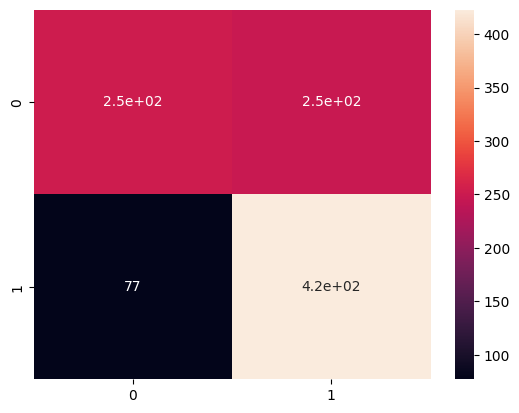

In [23]:
sns.heatmap(cm, annot=True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61       500
           1       0.63      0.85      0.72       500

    accuracy                           0.68      1000
   macro avg       0.70      0.68      0.67      1000
weighted avg       0.70      0.68      0.67      1000



## Saving and loading the model

In [25]:
model_json = network.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

In [26]:
from keras.models import save_model
network = save_model(network, 'weights.hdf5')

In [27]:
with open('model.json', 'r') as json_file:
  json_savedModel= json_file.read()

In [28]:
network_loaded = tf.keras.models.model_from_json(json_savedModel)
network_loaded.load_weights('weights.hdf5')

In [29]:
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3137)                │      19,678,401 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3137)                │       9,843,906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           6,276 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

## Classify one image

In [43]:
image = cv2.imread('/content/cat_dog_2/test_set/dog/dog.3501.jpg')

array([[[40, 37, 23],
        [40, 37, 23],
        [40, 37, 23],
        ...,
        [ 8, 20, 26],
        [11, 21, 28],
        [ 5, 15, 22]],

       [[52, 49, 35],
        [50, 47, 33],
        [46, 43, 29],
        ...,
        [13, 25, 31],
        [13, 23, 30],
        [ 3, 13, 20]],

       [[49, 48, 34],
        [44, 43, 29],
        [37, 36, 22],
        ...,
        [18, 28, 35],
        [15, 25, 32],
        [ 2, 12, 19]],

       ...,

       [[33, 27, 28],
        [33, 27, 28],
        [33, 27, 28],
        ...,
        [18, 14, 20],
        [15, 11, 17],
        [13,  9, 15]],

       [[33, 27, 28],
        [33, 27, 28],
        [33, 27, 28],
        ...,
        [23, 19, 25],
        [16, 12, 18],
        [12,  8, 14]],

       [[33, 27, 28],
        [33, 27, 28],
        [33, 27, 28],
        ...,
        [25, 21, 26],
        [18, 14, 20],
        [14, 10, 16]]], dtype=uint8)
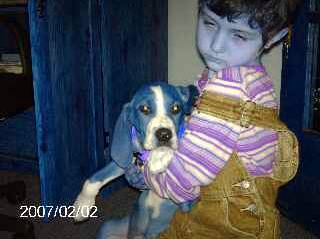

In [44]:
image

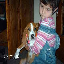

In [45]:
image = cv2.resize(image, (64,64))
cv2_imshow(image)

In [46]:
image = image/255

In [47]:
image

array([[[0.16862745, 0.15686275, 0.10196078],
        [0.18431373, 0.17647059, 0.12156863],
        [0.17647059, 0.16862745, 0.11372549],
        ...,
        [0.01568627, 0.09411765, 0.16470588],
        [0.11764706, 0.17254902, 0.21960784],
        [0.05882353, 0.10196078, 0.1254902 ]],

       [[0.03529412, 0.02352941, 0.00784314],
        [0.03137255, 0.01960784, 0.00784314],
        [0.03921569, 0.02745098, 0.01176471],
        ...,
        [0.03529412, 0.09411765, 0.16862745],
        [0.10588235, 0.15294118, 0.2       ],
        [0.02352941, 0.05490196, 0.08235294]],

       [[0.11372549, 0.09411765, 0.17254902],
        [0.1254902 , 0.10588235, 0.18823529],
        [0.09411765, 0.0745098 , 0.15294118],
        ...,
        [0.00784314, 0.04313725, 0.12156863],
        [0.15294118, 0.17647059, 0.22745098],
        [0.02745098, 0.03529412, 0.06666667]],

       ...,

       [[0.04705882, 0.02352941, 0.02745098],
        [0.04705882, 0.02352941, 0.02745098],
        [0.0627451 , 0

In [48]:
image = image.reshape(-1,64,64,3)

In [49]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.0650667, 0.9349333]], dtype=float32)>

In [50]:
result = np.argmax(result, axis=1)
result

array([1])

In [51]:
if result == 0:
  print('Cat')
else:
  print('Dog')

Dog
